In [ ]:
from read import *

U_s = read_excel_column("data.xlsx", "Sheet1", "A", 2, 16)
U_0a = read_excel_column("data.xlsx", "Sheet1", "B", 2, 16)
U_025a = read_excel_column("data.xlsx", "Sheet1", "C", 2, 16)

deltaU = []
for i in range(len(U_0a)):
    deltaU.append(U_025a[i] - U_0a[i])

k = []
for i in range(len(U_0a)):
    k.append(deltaU[i] / 0.0035915)

I_5v = read_excel_column("data.xlsx", "Sheet1", "D", 2, 11)
U_5v = read_excel_column("data.xlsx", "Sheet1", "E", 2, 11)
b = []
for i in range(len(I_5v)):
    b.append(I_5v[i] / 0.1 * 1.4366)

z = read_excel_column("data.xlsx", "Sheet1", "F", 2, 45)
x = []
for i in range(len(z)):
    x.append(z[i]-15.8)
    
dU = read_excel_column("data.xlsx", "Sheet1", "G", 2, 45)

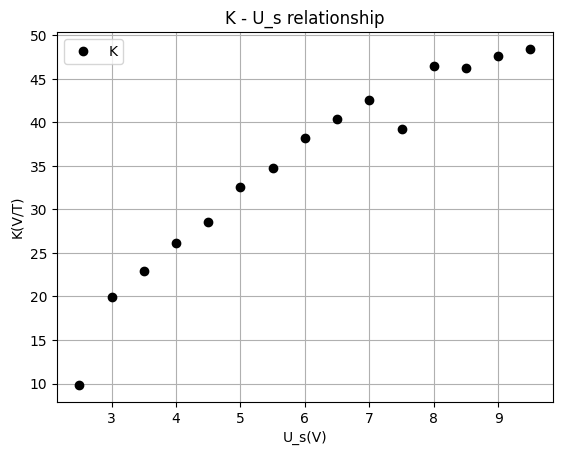

In [12]:
from plotter import *

plot = plotter()
plot.add_dataset(U_s, k, 'o', "K", 'black')
plot.show("K - U_s relationship", "U_s(V)", "K(V/T)")

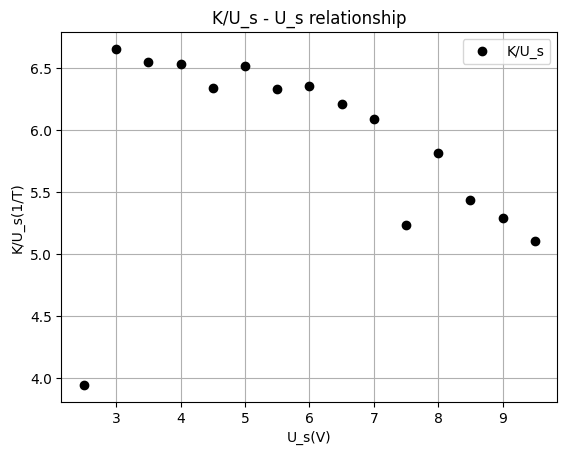

In [14]:
plot = plotter()

ku = []
for i in range(len(U_s)):
    ku.append(k[i] / U_s[i])

plot.add_dataset(U_s, ku, 'o', "K/U_s", 'black')
plot.show("K/U_s - U_s relationship", "U_s(V)", "K/U_s(1/T)")

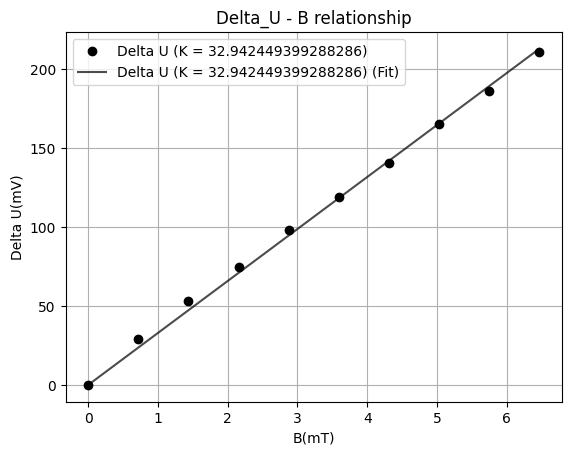

In [ ]:
from func import *
from plotter import *

plot = plotter()

k_5 = linear_regression_through_origin(b, U_5v)
plot.add_dataset(b, U_5v, 'o', f"Delta U (K = {k_5})", 'black', lambda x: k_5 * x)
plot.show("Delta_U - B relationship", "B(mT)", "Delta U(mV)")

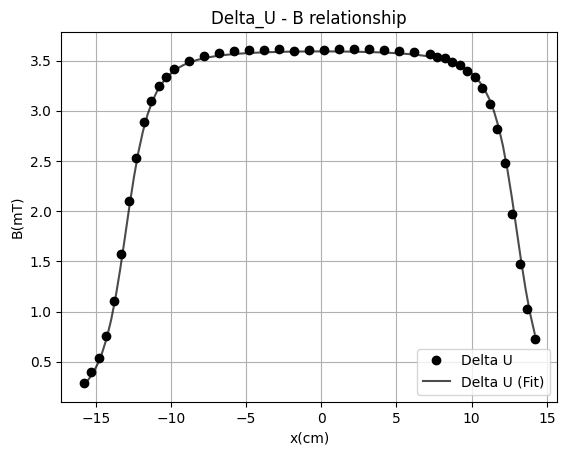

In [24]:
from plotter import *

b2 = []
for i in range(len(z)):
    b2.append(dU[i] / k_5)

plot = plotter()

def B_field(x, C=1.449e-3, L=0.260, D=0.0348):
    term1 = (L + 2*x) / (2 * np.sqrt(D**2 + (L + 2*x)**2))
    term2 = (L - 2*x) / (2 * np.sqrt(D**2 + (L - 2*x)**2))
    return C * (term1 + term2)

plot.add_dataset(x, b2, 'o', f"Delta U", 'black', lambda x: 2.5 * 1000 * B_field(x/100))
plot.show("Delta_U - B relationship", "x(cm)", "B(mT)")